## CHAPTER 1

## MULTIPLY MATRIX WITHOUT USING LIBRARY IN PYTHON

In [1]:
print("Matrix 1")
row_1 = int(input("Input number row of matrix 1: "))
column_1 = int(input("Input number column of matrix 1: "))
A = []
for i in range(row_1):
    row = list(map(float, input(f"Input each element row {i+1} of matrix 1 is separarated by commas: ").split()))
    A.append(row)
for i in A:
    print(i)
D = [[A[j][i] for j in range(row_1)] for i in range(column_1)]
print("Transpose of A (A^ T: )")
for i in D:
    print(i)
print("Matrix 2")
row_2 = int(input("Input number row of matrix 2: "))
column_2 = int(input("Input number column of matrix 2: "))
if column_1 != row_2:
    print("Matrix can not calculate multiply")
else: 
    B = []
    for i in range(row_2):
        row = list(map(float, input(f"Input each element column {i + 1} of matrix 2 is separated by commas: ").split()))
        B.append(row)
    for j in B:
        print(j)
    C = [[0 for _ in range(column_2)] for _ in range(row_1)]
    for i in range(row_1):
        for j in range(column_2):
            for k in range(column_1):
                C[i][j] += A[i][k] * B[k][j]
    print("Result of calculate multiply")
    for row in C:
        print(row)
# Find X to (X - A) * A^ T = B
X = [[0 for _ in range(column_2)] for _ in range(row_1)]
for i in range(row_1):
    for j in range(column_2):
        X[i][j] = (B[i][j] / D[i][j]) + A[i][j] if D[i][j] != 0 else None
print("Condition X to (X - A) * A^ T = B: ")
for x in X:
    print(x)


Matrix 1
[1.0, 4.0, 2.0]
[14.0, 3.0, 1.0]
Transpose of A (A^ T: )
[1.0, 14.0]
[4.0, 3.0]
[2.0, 1.0]
Matrix 2
[4.0, 3.0]
[65.0, 3.0]
[3.0, 5.0]
Result of calculate multiply
[270.0, 25.0]
[254.0, 56.0]
Condition X to (X - A) * A^ T = B: 
[5.0, 4.214285714285714]
[30.25, 4.0]


## MULTIPLY MATRIX WITH USING LIBRARY IN PYTHON

In [ ]:
import numpy as np
print("Matrix 1")
row_1 = int(input("Input number row of matrix 1: "))
column_1 = int(input("Input number column of matrix 1: "))
A = []
for i in range(row_1):
    row = list(map(float, input(f"Input each element row {i+1} of matrix 1 is separarated by commas: ").split()))
    A.append(row)
a = np.array(A)
c = a.T
print(a)
print("Matrix 2")
row_2 = int(input("Input number row of matrix 2: "))
column_2 = int(input("Input number column of matrix 2: "))
if column_1 != row_2:
    print("Matrix can not calculate multiply")
else: 
    B = []
    for i in range(row_2):
        row = list(map(float, input(f"Input each element column {i + 1} of matrix 2 is separated by commas: ").split()))
        B.append(row)
    b = np.array(B)
    print(b)
    mul = np.dot(a, b)
    print("Result of calculate multiply")
    print(mul)
# Find X to (X - A) * A^ T = B
X = (b / c) + a
print("Condition X to (X - A) * A^ T = B: ")
print(X)

Matrix 1
[[-1.  0.  1. -1.]
 [ 2.  1. -3.  4.]
 [ 1.  2. -2.  8.]
 [-2.  0.  2.  1.]]
Matrix 2
[[1. 1. 1. 1.]
 [2. 2. 3. 5.]
 [3. 3. 4. 5.]
 [1. 1. 1. 2.]]
Result of calculate multiply
[[ 1.  1.  2.  2.]
 [-1. -1. -3.  0.]
 [ 7.  7.  7. 17.]
 [ 5.  5.  7. 10.]]
Condition X to (X - A) * A^ T = B: 
[[-2.     0.5    2.    -1.5  ]
 [   inf  3.    -1.5      inf]
 [ 4.     1.    -4.    10.5  ]
 [-3.     0.25   2.125  3.   ]]


C:\Users\voanh\AppData\Local\Temp\ipykernel_8664\2134708356.py:32: RuntimeWarning: divide by zero encountered in divide
  X = (b / c) + a


## INVERSE MATRIX WITHOUT USING LIBRARY IN PYTHON

In [8]:
def calculator_det(A):
    n = len(A)
    if n == 1:
        return A[0][0]
    elif n == 2:
        return A[0][0] * A[1][1] - A[0][1] * A[1][0] 
    else:
        det = 0
        for column in range(n):
            submatrix = [row[:column] + row[column + 1:] for row in A[1:]]
            det += ((-1) ** column) * A[0][column] * calculator_det(submatrix)
        return det

def calculator_inverse(A):
    n = len(A)
    det_A = calculator_det(A)
    if det_A == 0:
        print("Cannot inverse matrix A because det is 0!")
        return None  
    else:
        C = [[0 for _ in range(n)] for _ in range(n)]
        for i in range(n):
            for j in range(n):
                submatrix = [row[:j] + row[j + 1:] for row in (A[:i] + A[i + 1:])]
                sub_det = calculator_det(submatrix)
                C[i][j] = ((-1) ** (i + j)) * sub_det
        D = [[C[j][i] for j in range(n)] for i in range(n)] 
        inverse = [[D[i][j] / det_A for j in range(n)] for i in range(n)]  
        return inverse
row = int(input("Input number row of matrix: "))
column = int(input("Input number column of matrix: "))

if row != column:
    print("Cannot calculate inverse!")
else:
    A = []
    for i in range(row):
        a = list(map(float, input(f"Input each variable of row {i + 1} in matrix: ").split()))
        A.append(a)
    print("Matrix: ")
    for j in A:
        print(j)
    
    inverse = calculator_inverse(A)
    if inverse:
        print("Inverse matrix is:")
        for row in inverse:
            print(row)


Matrix: 
[8.0, 5.0, 9.0]
[2.0, 5.0, 7.0]
[9.0, 8.0, 7.0]
Inverse matrix is:
[0.11413043478260869, -0.20108695652173914, 0.05434782608695652]
[-0.266304347826087, 0.1358695652173913, 0.20652173913043478]
[0.15760869565217392, 0.10326086956521739, -0.16304347826086957]


## INVERSE MATRIX WITH USING LIBRARY IN PYTHON

In [9]:
import numpy as np
row = int(input("Input number row of matrix: "))
column = int(input("Input number column of matrix: "))

if row != column:
    print("Can not inverse!")
else:
    matrix = []
    for i in range(row):
        row_1 = list(map(float, input(f"Input each variable row {i + 1} of matrix 1: ").split()))
        matrix.append(row_1)
    a = np.array(matrix)
    print(a)
    det_a = np.linalg.det(a)
    if det_a == 0:
        print("Can not inverse.")
    else:
        inverse = np.linalg.inv(a)
        print("Result inverse matrix: ")
        print(inverse)


[[8. 5. 9.]
 [2. 5. 7.]
 [9. 8. 7.]]
Result inverse matrix: 
[[ 0.11413043 -0.20108696  0.05434783]
 [-0.26630435  0.13586957  0.20652174]
 [ 0.1576087   0.10326087 -0.16304348]]


## TRANSITION MATRIX WITHOUT USING LIBRARY IN PYTHON

In [10]:
row_1 = int(input("Input number row of matrix: "))
column_1 = int(input("Input number column of matrix: "))
A = []
for i in range(row_1):
    row = list(map(float, input(f"Input each element row {i+1} of matrix 1 is separated by commas: ").split()))
    A.append(row)
print("Matrix: ")
for j in A:
    print(j)
C = [[0 for _ in range(row_1)] for _ in range(column_1)]
for i in range(row_1):
    for j in range(column_1):
        C[j][i] = A[i][j]
print("Result of transition matrix is: ")
for row in C:
    print(row)

Matrix: 
[8.0, 5.0, 9.0]
[2.0, 5.0, 7.0]
[9.0, 8.0, 7.0]
Result of transition matrix is: 
[8.0, 2.0, 9.0]
[5.0, 5.0, 8.0]
[9.0, 7.0, 7.0]


## TRANSITION MATRIX USING LIBRARY IN PYTHON

In [11]:
import numpy as np
row_1 = int(input("Input number row of matrix: "))
column_1 = int(input("Input number column of matrix: "))
matrix_1 = []
for i in range(row_1):
    row = list(map(float, input(f"Input each variable row {i + 1} of matrix: ").split()))
    matrix_1.append(row)
a = np.array(matrix_1)
print(a)
trans = a.T
print("Result transition matrix is: ")
print(trans)



[[8. 5. 9.]
 [2. 5. 7.]
 [9. 8. 7.]]
Result transition matrix is: 
[[8. 2. 9.]
 [5. 5. 8.]
 [9. 7. 7.]]


## ADD, SUB, DIV TWO MATRIXS WITHOUT USING LIBRARY IN PYTHON

In [ ]:
print("Matrix 1")
row_1 = int(input("Input number of row in matrix 1: "))
column_1 = int(input("Input number of column in matrix 1: "))
A = []
for i in range(row_1):
    a = list(map(float, input(f"Input each variable row {i + 1} of matrix 1: ").split()))
    A.append(a)
for j in A:
    print(j)
print("Matrix 2")
row_2 = int(input("Input number of row in matrix 2: "))
column_2 = int(input("Input number of column in matrix 2: "))
if row_1 != row_2 and column_1 != column_2:
    print("Matrix can not calculate add, subtraction or division.")
else:
    B = []
    for i in range(row_2):
        b = list(map(float, input(f"Input each variable row {i + 1} of matrix 2: ").split()))
        B.append(b)
    for j in B:
        print(j)

    C = [[0 for _ in range(row_1)] for _ in range(row_2)]
    D = [[0 for _ in range(row_1)] for _ in range(row_2)]
    E = [[0 for _ in range(row_1)] for _ in range(row_2)]
    for i in range(row_1):
        for j in range(row_2):
            C[i][j] = A[i][j] + B[i][j]
            D[i][j] = A[i][j] - B[i][j]
            E[i][j] = A[i][j] // B[i][j]
    print("Result of add double matrixs:")
    for a in C:
        print(a)
    print("Result of subtraction double matrixs: ")
    for b in D:
        print(b)
    print("Result of division double matrixs: ")
    for c in E:
        print(c)

Matrix 1
[8.0, 5.0, 9.0]
[2.0, 5.0, 7.0]
[9.0, 8.0, 7.0]
Matrix 2
[1.0, 4.0, 5.0]
[6.0, 4.0, 3.0]
[8.0, 5.0, 9.0]
Result of add double matrixs:
[9.0, 9.0, 14.0]
[8.0, 9.0, 10.0]
[17.0, 13.0, 16.0]
Result of subtraction double matrixs: 
[7.0, 1.0, 4.0]
[-4.0, 1.0, 4.0]
[1.0, 3.0, -2.0]
Result of division double matrixs: 
[8.0, 1.0, 1.0]
[0.0, 1.0, 2.0]
[1.0, 1.0, 0.0]


## ADD, SUB, DIV TWO MATRIXS USING LIBRARY IN PYTHON

In [13]:
import numpy as np
print("Matrix 1")
row_1 = int(input("Input number row of matrix 1: "))
column_1 = int(input("Input number column of matrix 1: "))
matrix_1 = []
for i in range(row_1):
    a = list(map(float, input(f"Input each variable row {i + 1} of matrix 1: ").split()))
    matrix_1.append(a)
    a = np.array(matrix_1)
print(matrix_1)
print("Matrix 2")
row_2 = int(input("Input number row of matrix 2: "))
column_2 = int(input("Input number column of matrix 2: "))
matrix_2 = []
if row_1 == row_2 and column_1 == column_2:
    for j in range(row_2):
        b = list(map(float, input(f"Input each variable row {j + 1} of matrix 2: ").split()))
        matrix_2.append(b)
    b = np.array(matrix_2)
    print(matrix_2)
    sum = a + b
    sub = a - b
    div = a // b
    mul_e = a * b # Mul each elementt
    print("Result sum matrix: ")
    print(sum)
    print("Result sub matrix: ")
    print(sub)
    print("Result div matrix: ")
    print(div)
    print("Result mul each elemrnt of matrix: ")
    print(mul_e)
else:
    print("Can not calculator!")

Matrix 1
[[8.0, 5.0, 9.0], [2.0, 5.0, 7.0], [9.0, 8.0, 7.0]]
Matrix 2
[[1.0, 4.0, 5.0], [6.0, 4.0, 3.0], [8.0, 5.0, 9.0]]
Result sum matrix: 
[[ 9.  9. 14.]
 [ 8.  9. 10.]
 [17. 13. 16.]]
Result sub matrix: 
[[ 7.  1.  4.]
 [-4.  1.  4.]
 [ 1.  3. -2.]]
Result div matrix: 
[[8. 1. 1.]
 [0. 1. 2.]
 [1. 1. 0.]]
Result mul each elemrnt of matrix: 
[[ 8. 20. 45.]
 [12. 20. 21.]
 [72. 40. 63.]]


## DIAGONAL MATRIX 

In [35]:
print("Matrix: ")
rows = int(input("Enter number of row in matrix: "))
columns = int(input("Enter number of column in matrix: "))
k = int(input("Enter number k: "))
if rows != columns:
    print("Must be square matrix!")
else:
    A = []
    for row in range(rows):
        a = list(map(float, input(f"Enter each variable row {row +1} in matrix: ").split()))
        A.append(a)
    for i in A:
        print(i)
    is_diagonal= True
    for i in range(rows):
        for j in range(columns):
            if i != j and A[i][j] != 0:
                is_diagonal = False
                break
        if not is_diagonal:
            break
    C = [[A[i][j] ** k for j in range(columns)] for i in range(rows)]
    if is_diagonal:
        print("Matrix is diagonal")
        print("Matrix A^k: ")
        for i in C:
            print(i)

    else:
        print("Matrix is not diagonal")

        


Matrix: 
[3.0, 0.0]
[0.0, 8.0]
Matrix is diagonal
Matrix A^k: 
[9.0, 0.0]
[0.0, 64.0]


## DIAGONAL MATRIX USING LIBRARY IN PYTHON

In [2]:
import numpy as np
print("Matrix: ")
rows = int(input("Enter number of row in matrix: "))
columns = int(input("Enter number of column in matrix: "))
k = int(input("Enter number k: "))
if rows != columns:
    print("Must be square matrix!")
else:
    A = []
    for row in range(rows):
        a = list(map(float, input(f"Enter each variable row {row +1} in matrix: ").split()))
        A.append(a)
    matrix = np.array(A)
    print(matrix)
    is_diagonal= True
    for i in range(rows):
        for j in range(columns):
            if i != j and A[i][j] != 0:
                is_diagonal = False
                break
        if not is_diagonal:
            break
    C = [[A[i][j] ** k for j in range(columns)] for i in range(rows)]
    if is_diagonal:
        print("Matrix is diagonal")
        print("Matrix A^k: ")
        for i in C:
            print(i)

    else:
        print("Matrix is not diagonal")


Matrix: 
[[1. 0. 0.]
 [0. 4. 0.]
 [0. 0. 9.]]
Matrix is diagonal
Matrix A^k: 
[1.0, 0.0, 0.0]
[0.0, 64.0, 0.0]
[0.0, 0.0, 729.0]


## FIND CONDITION FOR THE MATRIX TO BE INVERTED

In [1]:
from sympy import Matrix, symbols, solve
m = symbols('m')
A = Matrix([[m + 1, 1, 3], [2, m + 2, 0], [2* m, 1, 3]])
print("Matrix A: ")
print(A)
det_a = A.det()
solution = solve(det_a, m)
print("The values of m so that matrix A is not reversible are:", solution)

Matrix A: 
Matrix([[m + 1, 1, 3], [2, m + 2, 0], [2*m, 1, 3]])
The values of m so that matrix A is not reversible are: [-2, 1]


## CHAPTER 2


## RANK OF MATRIX WITHOUT USING LIBRARY IN PYTHON

In [ ]:
def rank_matrix():
    print("Matrix:")
    rows = int(input("Enter the number of row in matrix: "))
    columns = int(input("Enter the number of column in matrix: "))
    matrix = []
    for i in range(rows):
        a = list(map(float, input(f"Enter each element of row {i + 1} in matrix: ").split()))
        matrix.append(a)
    for row in matrix:
        print(row)

    rank = 0
    epsilon = 1e-10
    for col in range(columns):
        pivot_row = None
        for r in range(rank, rows):
            if abs(matrix[r][col]) > epsilon:
                pivot_row = r
                break
        if pivot_row is None:
            continue
        matrix[rank], matrix[pivot_row] = matrix[pivot_row], matrix[rank]
        pivot_value = matrix[rank][col]
        for r in range(rank + 1, rows):
            factor = matrix[r][col] / pivot_value
            matrix[r][col] = 0.0
            for c in range(col + 1, columns):
                matrix[r][c] -= factor * matrix[rank][c]
        rank += 1
    return rank

print(f"Rank of matrix is: {rank_matrix()}")

Matrix:
[1.0, 2.0, 3.0]
[4.0, 5.0, 6.0]
[7.0, 8.0, 9.0]
Rank of matrix is: 2


## RANK OF MATRIX USING LIBRARY IN PYTHON

In [ ]:
import numpy as np
def matrix_rank():
    matrix = []
    row = int(input("Enter the number of row in matrix: "))
    column = int(input("Enter the number of column in matrix: "))
    for i in range(row):
        a = list(map(int, input(f"Enter each variable row {i + 1} of matrix: ").split()))
        matrix.append(a)
    matrix = np.array(matrix)
    print("Matrix: ")
    print(matrix)
    _, singular_values, _ = np.linalg.svd(matrix)
    tolerance = max(matrix.shape) *np.finfo(singular_values.dtype).eps
    rank = np.sum(singular_values > tolerance)
    return rank

print(f"Rank of matrix: {matrix_rank()}")


Matrix: 
[[1 0 2 1]
 [2 2 1 2]
 [0 2 0 1]
 [1 0 1 0]]
Rank of matrix: 4


## IN R^ 4:
## B = {v1 = (1, 1, 1, 1), v2 = (0, 1, 1, 1), v3 = (1, 0, 1, 1), v4 = (1, 1, 0, 1)};
## S = {s1 = (1, 1, 0, 0), s2 = (0, 1, 1, 0), s3 = (0, 0, 1, 1), s4 = (1, 0, 0, 0)};
## (1) Prove that S and B are bases of R^ 4
## (2) Find matrix convert B to S
## (3) Find the coordinates of vector: u in basis B, knowing (u)s = (1, -2, 3, -4).

In [ ]:
def det(matrix):
    n = len(matrix)
    if n == 1:
        return matrix[0][0]
    elif n == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    else:
        det_a = 0
        for column in range(n):
            sub_matrix = [row[:column] + row[column + 1:] for row in matrix[1:]]
            det_a += ((-1) ** column) * matrix[0][column] * det(sub_matrix)
        return det_a
    
def inverse_matrix(matrix):
    row = len(matrix)
    det_inv_matrix = det(matrix)
    if row == len(matrix[0]) and det_inv_matrix != 0:
        C = [[0 for _ in range(row)] for _ in range(row)]
        for i in range(row):
            for j in range(row):
                sub_matrix = [r[:j] + r[j+1:] for r in (matrix[:i] + matrix[i+1:])]
                sub_det = det(sub_matrix)
                C[i][j] = ((-1) ** (i + j)) * sub_det

        D = [[C[j][i] for j in range(row)] for i in range(row)]
        inverse = [[D[i][j] / det_inv_matrix for j in range(row)] for i in range(row)]
        return inverse
    else:
        raise ValueError("Matrix is not invertible.")
B = [[1, 1, 1, 1], 
     [0, 1, 1, 1], 
     [1, 0, 1, 1], 
     [1, 1, 0, 1]]

S = [[1, 1, 0, 0], 
     [0, 1, 1, 0], 
     [0, 0, 1, 1], 
     [1, 0, 0, 0]]
#(1) Prove that S and B are bases of R^ 4
if det(B) == 0:
    print("B is not a base of R^4")
else:
    print("B is a base of R^4")
if det(S) == 0:
    print("S is not a base of R^4")
else:
    print("S is a base of R^4")

#(2) Find matrix convert B to S
S_inv = inverse_matrix(S)
P_B_to_S = [[sum(S_inv[i][k] * B[k][j] for k in range(len(B))) for j in range(len(B[0]))] for i in range(len(S_inv))]
print("\nMatrix converting from B to S (P_B_to_S):")
for row in P_B_to_S:
    print(row)

# (3) Find the coordinates of vector: u in basis B, knowing (u)s = (1, -2, 3, -4).
def find_coordinates(P_inv, u_S):
    n = len(P_inv)
    return [sum(P_inv[i][j] * u_S[j] for j in range(n)) for i in range(n)]
u_S = [1, -2, 3, -4]
P_S_to_B = inverse_matrix(P_B_to_S)
u_B = find_coordinates(P_S_to_B, u_S)

print("\nCoordinates of vector u in basis B:")
print(u_B)


B is a base of R^4
S is a base of R^4

Matrix converting from B to S (P_B_to_S):
[1.0, 1.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 1.0]
[1.0, -1.0, 1.0, 0.0]

Coordinates of vector u in basis B:
[-2.0, 0.0, -2.0, 3.0]


## MA TRẬN XOAY Ở MỘT GÓC BẤT KÌ TRÊN PYTHON, DUNG CÔNG THỨC LƯỢNG GIÁC
I = (0,1), J = (1, 0)

C:\Users\voanh\AppData\Local\Temp\ipykernel_6892\2804029459.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


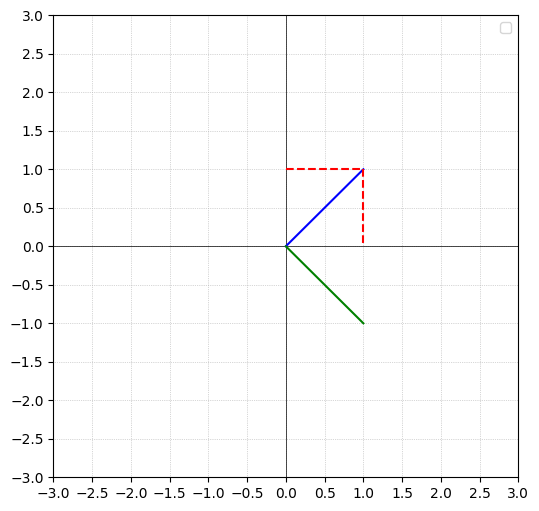

In [ ]:
import matplotlib.pyplot as plt
from math import cos, sin, radians
import numpy as np

# Initialize vector to rotate clockwise
angle = int(input("Enter the angle want to rotate: "))
rad = radians(angle)  # đổi sang radian

# Basis vector
v = np.array([1, 1])

# Initialize the matrix to rotate the vector clockwise
rotation_matrix = np.array([[cos(rad), sin(rad)], [-sin(rad), cos(rad)]])

# Vector was rotated
v_rotated = np.dot(rotation_matrix, v)

fig, ax = plt.subplots(figsize=(6, 6)) # Size of table to show result
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xticks(np.arange(-3, 3.5, 0.5))
ax.set_yticks(np.arange(-3, 3.5, 0.5))
ax.grid(True, linestyle=":", linewidth=0.5)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Draw basis vector
ax.plot([0, v[0]], [0, v[1]], color='blue')
ax.plot([v[0], v[0]], [v[1], 0], color='red', linestyle="--")
ax.plot([0, v[0]], [v[1], v[1]], color='red', linestyle="--")
# Draw vector was rotated
ax.plot([0, v_rotated[0]], [0, v_rotated[1]], color='green')

plt.show()


## FIND EIGENVALUES WITHOUT USE LIBRARY IN PYTHON

In [ ]:
from sympy import Matrix, symbols, solve
def calculate_det(a):
    n = len(a)
    if n == 1:
        return a[0][0]
    elif n == 2:
        return a[0][0]*a[1][1] - a[0][1]*a[1][0]
    else:
        det_a = 0
        for column in range(n):
            sub_matrix = [row[:column] + row[column+1:] for row in a[1:]]
            det_a += ((-1) ** column) * a[0][column] * calculate_det(sub_matrix)
        return det_a
rows = int(input("Enter the number of rows: "))
columns = int(input("Enter the number of columns: "))
if rows != columns:
    print("Error: Matrix must be square!")
    exit()
A = []
for i in range(rows):
    a = list(map(int, input(f"Enter the variable of row {i + 1}: ").split()))
    A.append(a)
print("Matrix: ")
for i in A:
    print(i)
x = symbols("x")
A_char = []
for i in range(rows):
    row_char = []
    for j in range(columns):
        if i == j:
            row_char.append(A[i][j] - x)
        else:
            row_char.append((A[i][j]))
    A_char.append(row_char)
det_char = calculate_det(A_char)
private = solve(det_char, x)
print(f"Private treatment of matrix: {private}")
            
               

Matrix: 
[2, -1]
[-1, 2]
Private treatment of matrix: [1, 3]


## FIND EIGENVALUES USE LIBRARY IN PYTHON

In [6]:
import numpy as np
matrix = [[2, -1], [-1, 2]]
eigenvalues = np.linalg.eigvals(matrix)
print(f"Matrix: \n {matrix}")
print("Eigenvalues is: ")
print(eigenvalues)

Matrix: 
 [[2, -1], [-1, 2]]
Eigenvalues is: 
[3. 1.]


## Trong ℝ ,bằng quá trình Gram-Smidt hãy trực chuẩn hóa hệ véc tơ:
## 𝐵={𝑣 = 1,−1,1 ,𝑣 =−1,1,1 ,𝑣 =(1,1,−1)}.


In [ ]:
import numpy as np
def gram_schmidt(v):
    v = np.array(v, dtype=np.float64)
    m, n = v.shape
    u = []
    for i in range(n):
        u_i = v[:, i]
        for u_j in u:
            proj = (np.dot(u_j, u_i) / np.dot(u_j, u_j) * u_j)
            u_i = u_i - proj
        norm_u_i = np.linalg.norm(u_i)
        if norm_u_i > 1e-10:
            u.append(u_i / norm_u_i)
    return np.array(u)
num_vector = int(input("Enter the number of vector: "))
vector_dim = int(input("Enter the d of vector: "))
vectors = []
for i in range(num_vector):
    while True:
        vector = list(map(int, input(f"Enter the variable of vector {i+1}: ").split()))
        if len(vector) != vector_dim:
            print("Enrol can not calculate")
        else:
            break
    vectors.append(vector)
v = np.array(vectors).T
u = gram_schmidt(v)
print("Normalization vector is: ")
print(u.T)

Normalization vector is: 
[[ 0.57735027 -0.40824829  0.70710678]
 [-0.57735027  0.40824829  0.70710678]
 [ 0.57735027  0.81649658  0.        ]]


## CODE MA TRẬN XÁC ĐỊNH ÂM, XÁC ĐỊNH DƯƠNG, BÁN XÁC ĐỊNH ÂM, BÁN XÁC ĐỊNH DƯƠNG KHÔNG DÙNG THƯ VIỆN TRONG PYTHON

In [20]:
from sympy import symbols, solve

def calculate_det(a):
    n = len(a)
    if n == 1:
        return a[0][0]
    elif n == 2:
        return a[0][0]*a[1][1] - a[0][1]*a[1][0]
    else:
        det_a = 0
        for column in range(n):
            sub_matrix = [row[:column] + row[column+1:] for row in a[1:]]
            det_a += ((-1) ** column) * a[0][column] * calculate_det(sub_matrix)
        return det_a

rows = int(input("Enter the number of row: "))
columns = int(input("Enter the number of columns: "))

C = [[0 for _ in range(columns)] for _ in range(rows)]
A = []
for i in range(rows):
    a = list(map(int, input(f"Enter the variable of row {i + 1}: ").split()))
    A.append(a)
for i in range(rows):
    for j in range(columns):
        C[i][j] = A[j][i]

symmetric = True
for i in range(rows):
    for j in range(columns):
        if A[i][j] != C[i][j]:
            symmetric = False
            break
if not symmetric:
    print("Matrix not symmetry")
else:
    x = symbols("x")
    A_char = []
    for i in range(rows):
        row_char = []
        for j in range(columns):
            if i == j:
                row_char.append(A[i][j] - x)
            else:
                row_char.append(A[i][j])
        A_char.append(row_char)
    det_char = calculate_det(A_char)

    private = solve(det_char, x)

    if all(p > 0 for p in private):
        print("Positive define matrix")
    elif all(p < 0 for p in private):
        print("Negative define matrix")
    elif all(p >= 0 for p in private):
        print("Positive semi-define matrix")
    elif all(p <= 0 for p in private):
        print("Negative semi-define matrix")
    else:
        print("Can not define")


Positive define matrix


## CODE MA TRẬN XÁC ĐỊNH ÂM, XÁC ĐỊNH DƯƠNG, BÁN XÁC ĐỊNH ÂM, BÁN XÁC ĐỊNH DƯƠNG DÙNG THƯ VIỆN TRONG PYTHON

In [18]:
import numpy as np
def classify_matrix(matrix: np.ndarray) -> str:
    if not np.allclose(matrix, matrix.T):
        return "Matrix not symmetry"
    eigenvalues = np.linalg.eigvals(matrix)
    if np.all(eigenvalues > 0):
        return "Positive define matrix"
    elif np.all(eigenvalues < 0):
        return "Negative define matrix"
    elif np.all(eigenvalues >= 0):
        return "Positive semi-define matrix"
    elif np.all(eigenvalues <= 0):
        return "Negative semi-define matrix"
    else:
        return "Can not define"
rows = int(input("Enter the number of row: "))
columns = int(input("Enter the number of columns: "))
A = []
for i in range(rows):
    a = list(map(int, input(f"Enter each variable for row {i+1}: ").split()))
    A.append(a)
matrix = np.array(A)
print("MAtrix: ")
print(matrix)
print(classify_matrix(matrix))

MAtrix: 
[[2 1]
 [1 2]]
Positive define matrix


## KER, LM

In [ ]:
import numpy as np
from scipy.linalg import null_space

A = np.array([[1, 2],
              [2, 4],
              [3, 6]])

# ker()
ker = null_space(A)
print("Kernel (Null space):")
print(ker)

# lm()
u, s, vh = np.linalg.svd(A)
image = u[:, :np.linalg.matrix_rank(A)]
print("Image (Column space):")
print(image)


Kernel (Null space):
[[-0.89442719]
 [ 0.4472136 ]]
Image (Column space):
[[-0.26726124]
 [-0.53452248]
 [-0.80178373]]


## CHAPTER 3

## ĐẠO HÀM

## CÔNG THỨC ĐẠO HÀM TỔNG QUÁT

In [21]:
from sympy import symbols, solve
x = symbols("x")
for i in [0.01, 0.009, 0.008, 0]:
    fx = (((x+i) -x) / i)

    print(fx) 

1.00000000000000
1.00000000000000
1.00000000000000
nan


## CÔNG THỨC ĐẠO HÀM BẰNG THƯ VIỆN CỦA PYTHON


In [3]:
from sympy import solve, symbols, sympify, diff
x = symbols('x')
f = sympify("5*x^3 + 6*x^2 + 1")
dao_ham = diff(f, x, 1)
print(f)
print(f"Đạo hàm: {dao_ham}")

5*x**3 + 6*x**2 + 1
Đạo hàm: 15*x**2 + 12*x


## THUẬT TOÁN GRAM-SMIDT

In [ ]:
import math
import numpy as np

A = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
matrix = np.array(A)
rows = len(A)
columns = len(A[0])
v1 = matrix[0]
v2 = matrix[1]
v3 = matrix[2]
matrix_truc_chuan = []
#U1
do_dai_u1 = 0
for i in range(columns): 
    do_dai_u1 += matrix[0][i] ** 2 
u1 = [v1 / math.sqrt(do_dai_u1)] 
matrix_truc_chuan.append(u1[0])   

#U2
tich_vo_huong_u1_v2 = 0
for i in range(columns):  
    tich_vo_huong_u1_v2 += u1[0][i] * v2[i]  
t = -(tich_vo_huong_u1_v2)
u2_phay = t * u1[0] + v2 
do_dai_u2 = 0
for i in range(columns):
    do_dai_u2 += u2_phay[i] ** 2  
u2 = u2_phay / math.sqrt(do_dai_u2)  
matrix_truc_chuan.append(u2)

#U3
tich_vo_huong_u1_v3 = 0
for i in range(columns):
    tich_vo_huong_u1_v3 += u1[0][i] * v3[i]
a = -(tich_vo_huong_u1_v3)

tich_vo_huong_u2_v3 = 0
for i in range(columns):
    tich_vo_huong_u2_v3 += u2[i] * v3[i]  
b = -(tich_vo_huong_u2_v3)

u3_phay = a * u1[0] + b * u2 + v3
do_dai_u3 = 0
for i in range(columns):
    do_dai_u3 += u3_phay[i] ** 2  
u3 = [u3_phay / math.sqrt(do_dai_u3)] 
matrix_truc_chuan.append(u3[0])  

matrix_truc_chuan = np.array(matrix_truc_chuan)
print("Matrix truc chuan: ")
print(matrix_truc_chuan)


Matrix truc chuan: 
[[ 0.26726124  0.53452248  0.80178373]
 [ 0.87287156  0.21821789 -0.43643578]
 [ 0.93704257  0.15617376 -0.31234752]]


## TAYLOR

In [25]:
from sympy import symbols, sympify, diff
def factorial(n):
    return 1 if n <= 1 else n* factorial(n-1)
x = symbols("x")
f_x = sympify(5*(x**2))
def dao_ham_cap_n(n):
    dao_ham = diff(f_x, x, n)
    return dao_ham
x = float(input("Enter the number x: "))
result = 5*(x**2)
n = int(input("Enter the number want to dao_ham stop: "))
def f(f_x):
    result += (dao_ham_cap_n(f_x) / factorial(n)) * (x ** n)
print(result)

0.05000000000000001
